In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [13]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [00:39<00:00, 42.0MB/s]
100% 1.37G/1.37G [00:39<00:00, 37.4MB/s]


In [20]:
! unzip bird-species-classification.zip

Archive:  bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/

In [22]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [23]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 150 images belonging to 16 classes.


In [24]:
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 157 images belonging to 16 classes.


In [25]:
train.class_indices  

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [26]:
img_size=(224,224)


In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train.class_indices), activation='softmax'))


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
train_steps_per_epoch = train.n // train.batch_size
test_steps_per_epoch = test.n // test.batch_size

In [30]:
history = model.fit(
    train,
    epochs=20,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test,
    validation_steps=test_steps_per_epoch
)


Epoch 1/20
4/4 [==============================] - 100s 25s/step - loss: 5.6224 - accuracy: 0.0678 - val_loss: 3.0078 - val_accuracy: 0.1250
Epoch 2/20
4/4 [==============================] - 112s 35s/step - loss: 2.8118 - accuracy: 0.1356 - val_loss: 2.6925 - val_accuracy: 0.1250
Epoch 3/20
4/4 [==============================] - 86s 26s/step - loss: 2.5909 - accuracy: 0.1780 - val_loss: 2.6909 - val_accuracy: 0.1562
Epoch 4/20
4/4 [==============================] - 112s 35s/step - loss: 2.3646 - accuracy: 0.2542 - val_loss: 2.5354 - val_accuracy: 0.1641
Epoch 5/20
4/4 [==============================] - 84s 25s/step - loss: 2.3898 - accuracy: 0.2542 - val_loss: 2.6366 - val_accuracy: 0.1641
Epoch 6/20
4/4 [==============================] - 86s 26s/step - loss: 2.3495 - accuracy: 0.2627 - val_loss: 2.6045 - val_accuracy: 0.1797
Epoch 7/20
4/4 [==============================] - 112s 35s/step - loss: 2.2824 - accuracy: 0.2458 - val_loss: 2.5763 - val_accuracy: 0.2656
Epoch 8/20
4/4 [=======

In [31]:
model.save('bird.h5')

In [32]:

# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [34]:
img1 = image.load_img('/content/bird1.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 241ms/step
5
gretit


In [35]:
img1 = image.load_img('/content/bird2.webp',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
14
rebimg


In [36]:
img1 = image.load_img('/content/bird3.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 25ms/step
5
gretit


4/4 [==============================] - 41s 10s/step - loss: 2.8711 - accuracy: 0.1875
Testing Loss: 2.8711
Testing Accuracy: 0.1875


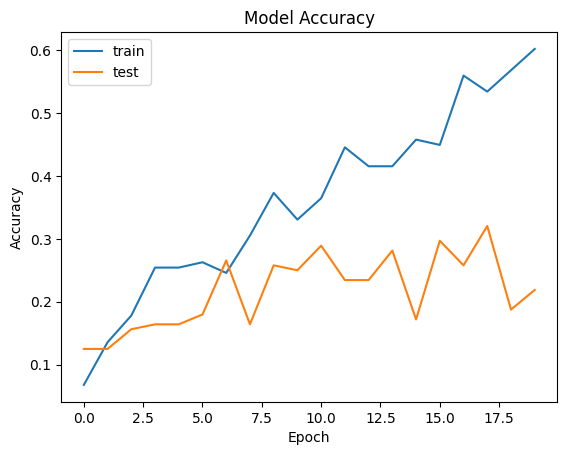

In [37]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test, steps=test_steps_per_epoch)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()